In [1]:
import os, sys
import torch
root_dir = '../'
sys.path.append(root_dir)
from config import config
from model.train import load_eval
from model import datasets, utils
import matplotlib.pyplot as plt
from model.utils import compute_rdf, create_and_save_hist2d

In [2]:
dir_paths = os.path.join(root_dir, 'output')

dir_paths = os.listdir(dir_paths)
dir_path = dir_paths[-1]

print(dir_path)

dir_path = os.path.join(root_dir, 'output', dir_path)
path_param = '../config/params3d.yml'
cfg = config.load_config(path_param)

20250512_122925_N3456_n128_k5_d3


In [ ]:
cfg.data.eval_data_dir = '../../SAM_dataset/data4/300K/'
config.check_data_config(cfg)
config.check_device_config(cfg)
dataset = datasets.get_dataset(cfg, mode='eval')

mean_true4 = dataset.mean
std_true4 = dataset.std
x_true4 = dataset.x_sam


In [ ]:
# cfg.data.eval_data_dir = '../../SAM_dataset/data6/300K/'
# config.check_data_config(cfg)
# config.check_device_config(cfg)
# dataset = datasets.get_dataset(cfg, mode='eval')

# mean_true6 = dataset.mean
# std_true6 = dataset.std
# x_true6 = dataset.x_sam

In [34]:
cfg.data.eval_data_dir = '../../SAM_dataset/data12/700_02/'
config.check_data_config(cfg)
config.check_device_config(cfg)
dataset = datasets.get_dataset(cfg, mode='eval')

mean_true12 = dataset.mean
std_true12 = dataset.std
x_true12 = dataset.x_sam
x_all = dataset.x_all
print(x_all.shape)
print(x_true12.shape)

torch.Size([20000, 3, 3456])
torch.Size([20000, 3, 128])


In [24]:
cond = '500_02'
eval_path = os.path.join(dir_path, f'eval_{cond}/eval.pth')
eval = torch.load(eval_path)
x_pred12 = eval['x_pred']
print(x_pred12.shape)
print(x_true12.shape)

torch.Size([20000, 3, 128])
torch.Size([10000, 3, 128])


C:\Users\78103\AppData\Local\Temp\ipykernel_17756\2361671445.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  eval = torch.load(eval_path)


In [27]:
# _, _, num_atoms = dataset.shape
# num_samples = 1000
# data = dataset.x_all[:num_samples]
# print(data.shape)
# for i in tqdm.tqdm(range(num_samples)):
#     with open(f'../md/data12/xyz/output{i}.xyz', 'w') as f:
#         f.write(f"{num_atoms}\n")
#         f.write(f"Sample {i}\n")
#         for j in range(num_atoms):
#             x, y, z = data[i, :, j].tolist()
#             f.write(f"Fe {x} {y} {z}\n")

(0.0, 11.45797056652)

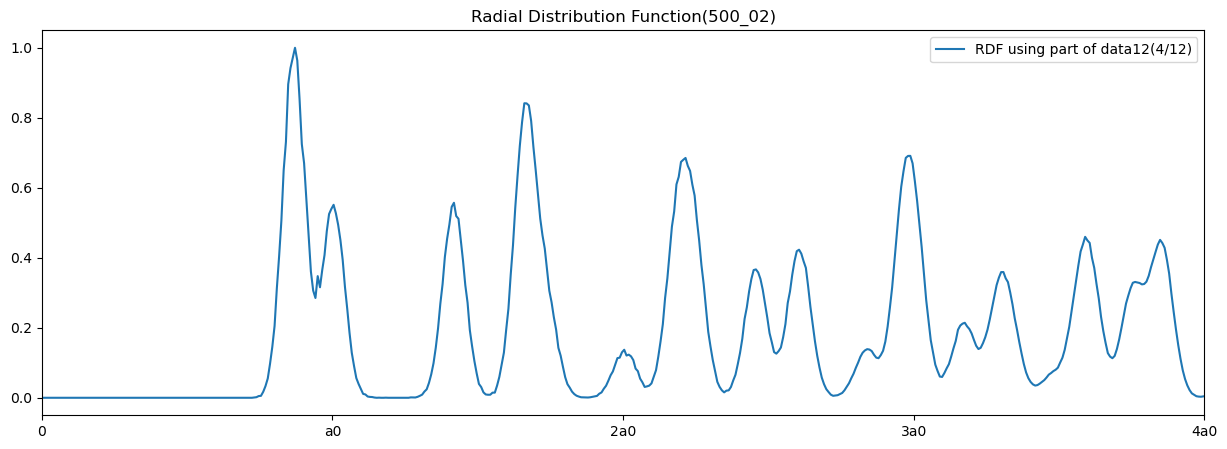

In [35]:
a0 = 2.86449264163000

fig, ax = plt.subplots(figsize=(15, 5))

# r_values_all, g_r_all = compute_rdf(x_all, 12*a0, 12*a0, 0.5*a0, a0/128)
# g_r_all = g_r_all / torch.max(g_r_all)
# ax.plot(r_values_all.cpu(), g_r_all.cpu(), label='RDF using all data of data12')

r_values_true12, g_r_true12 = compute_rdf(x_true12, 12*a0, 12*a0, 0.5*a0, a0/128)
g_r_true12 = g_r_true12 / torch.max(g_r_true12)
ax.plot(r_values_true12.cpu(), g_r_true12.cpu(), label=f'RDF using part of data12({cfg.data.nx}/{cfg.data.nx_max})')

# r_values_true6, g_r_true6 = compute_rdf(x_true6, 4*a0, 4*a0, 0.5*a0, a0/128)
# ax.plot(r_values_true6.cpu(), g_r_true6.cpu(), label='True RDF6')

# r_values_true4, g_r_true4 = compute_rdf(x_true4, 6*a0, 6*a0, 0.5*a0, a0/128)
# ax.plot(r_values_true4.cpu(), g_r_true4.cpu(), label='True RDF4')

# r_values_pred12, g_r_pred12 = compute_rdf(x_pred12, 12*a0, 12*a0, 0.5*a0, a0/128)
# g_r_pred12 = g_r_pred12 / torch.max(g_r_pred12)
# ax.plot(r_values_pred12.cpu(), g_r_pred12.cpu(), label='Pred RDF')

ax.set_title(f'Radial Distribution Function({cond})')

xticks = [0*a0, 1*a0, 2*a0, 3*a0, 4*a0, 5*a0, 6*a0]
xtick_labels = ['0', 'a0', '2a0', '3a0', '4a0', '5a0', '6a0']
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)
ax.legend()
ax.set_xlim(0.*a0, 4*a0)



In [29]:
x_pred = x_pred12[:,0:2,0:4]
x_true = x_true12[:,0:2,0:4]

fig, axes = plt.subplots(
    nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10, 5))
x_pred = x_pred.reshape(-1, 2)
x_true = x_true.reshape(-1, 2)
axes[0].hist2d(x_pred[:, 0].cpu().numpy(), x_pred[:, 1].cpu().numpy(), bins=50, cmap='Blues')
axes[0].set_title('Predicted Data')
axes[0].set_xlabel('X axis')
axes[0].set_ylabel('Y axis')

axes[1].hist2d(x_true[:, 0].cpu().numpy(), x_true[:, 1].cpu().numpy(), bins=50, cmap='Blues')
axes[1].set_title('True Data')
axes[1].set_xlabel('X axis')
axes[1].set_ylabel('Y axis')

fig.colorbar(axes[0].collections[0], ax=axes[0], label='Counts')
fig.colorbar(axes[1].collections[0], ax=axes[1], label='Counts')

# path = os.path.join('.', 'hist2d.png')
# plt.savefig(path)
# plt.close()

# create_and_save_hist2d(x_pred12[:,0:2,0:4], x_true12[:,0:2,0:4], '.')


NameError: name 'x_pred12' is not defined